# 네이버 뉴스 목록 가져오기

> 1. 네이버 오픈 API로 기사 URL 크롤링
> 2. bs4 + selenium으로 기사 제목 및 내용 크롤링

In [2]:
with open('계정.txt') as f:
    id = f.readline().strip()
    secret = f.readline().strip()

[뉴스 검색 API 설명서](https://developers.naver.com/docs/search/news/)

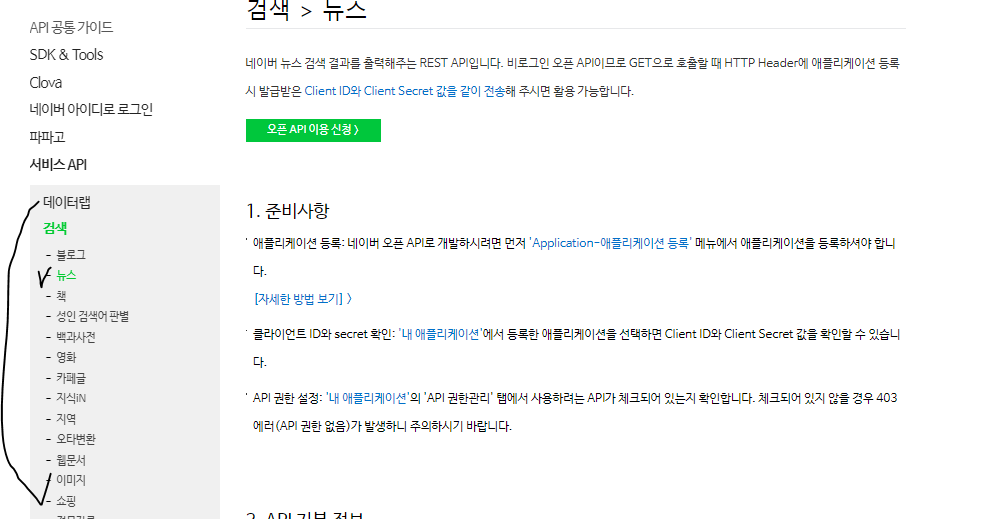

## 키워드로 기사 검색
- 10개의 기사 조회

In [38]:
import requests

client_id = id
client_secret = secret

# keyword = input('검색할 단어:')
keyword = "손흥민"

# url 뒤의 blog를 news로 변경 (news 검색이므로)
url = "https://openapi.naver.com/v1/search/news?query={}".format(keyword) # json 결과

headers = {
    "X-Naver-Client-Id":client_id,
    "X-Naver-Client-Secret":client_secret
}
res = requests.get(url, headers=headers)

if(res.status_code==200):
    result = res.json()

else:
    print("Error Code:%d" % res.status_code)
    print(res.text) # 이 에러메세지와 개발자 document 에러코드 설명을 확인

In [22]:
result

{'lastBuildDate': 'Sun, 03 Nov 2019 14:13:49 +0900',
 'total': 306284,
 'start': 1,
 'display': 10,
 'items': [{'title': "<b>손흥민</b>, 에버튼전 '한국인 유럽 무대 최다골' 도전",
   'originallink': 'http://stoo.asiae.co.kr/article.php?aid=59385928433',
   'link': 'http://stoo.asiae.co.kr/article.php?aid=59385928433',
   'description': '<b>손흥민</b>(토트넘 홋스퍼)이 한국인 유럽 무대 최다골에 도전한다. 토트넘은 4일(한국시각) 영국 리버풀 구디슨파크에서 열리는 2019-2020 잉글랜드 프리미어리그(PL) 11라운드 에버튼과의 원정 경기를 치른다. <b>손흥민</b>은... ',
   'pubDate': 'Sun, 03 Nov 2019 13:57:00 +0900'},
  {'title': '프리미어리그(EPL) 토트넘 에버튼 예상 라인업, <b>손흥민</b> 선발 출격',
   'originallink': 'http://www.kyeongin.com/main/view.php?key=20191103001351544',
   'link': 'http://www.kyeongin.com/main/view.php?key=20191103001351544',
   'description': '토트넘 <b>손흥민</b> /런던 AP=연합뉴스 \xa0프리미어리그(EPL) 토트넘 에버튼 예상 라인업이 공개됐다.토트넘은... 케인, <b>손흥민</b>의 선발이 예상됐다.요리스와 라멜라는 부상으로, 로즈는 퇴장 징계로 각각 결장한다.한편... ',
   'pubDate': 'Sun, 03 Nov 2019 13:54:00 +0900'},
  {'title': "새 역사 앞둔 <b>손흥민</b>, '마침' 에버튼을 만난다 [토트넘-에버튼]",
   

# Guide
- 제목(title), 기사내용(desciption) 전체가 나오는 것이 아니라 일부만 나온다. 그래서 글중에 ... 이 있다.
    - 그러므로 기사 크롤링을 위해서는 url을 가져와서 실제 그 기사로 이동해 가져 와야 한다.
- 글내용을 가져와야 하는데 신문사마다 포멧이 다르므로 가져오려면 url로 신문사를 구분해서 그것별로 크롤링 해야 하는데 힘들다. 
    - 모바일 일 경우는 좀더 많이 가져올 수 있다.
- **네이버 뉴스 기사만 가져온다.**    
- 조회결과 항목
    - https://developers.naver.com/docs/search/news/
    - display : 몇개의 내용이 조회되었는지
    - items: 기사 정보
        - 기사 링크 
            - originallink : 신문사 링크
            - link : 네이버에서 기사를 제공할 경우 네이버 링크를 제공(클릭시 신문사로 이동하는 경우 orignallink 와 동일)
                - 네이버 기사는 news.naver.com 이 들어간다.
        - pubDate: 기사제공시간. 
            - Wed, 06 Nov 2019 21:05:42 +0900  =? +0900은 잘라낸다. (표준시 기준 9시간 후 표시)
           - 형식문자 : %a, %d %b %Y %H:%M:%S
                
            

## 네이버 뉴스 기사 링크만 조회

In [27]:
import requests

client_id = id
client_secret = secret

# keyword = input('검색할 단어:')
keyword = "손흥민"
# url 뒤의 blog를 news로 변경 (news 검색이므로)
url = "https://openapi.naver.com/v1/search/news?query={}".format(keyword) # json 결과

headers = {
    "X-Naver-Client-Id":client_id,
    "X-Naver-Client-Secret":client_secret
}
news_link = [] #뉴스 링크들을 저장할 리스트

res = requests.get(url, headers=headers)


if(res.status_code==200):
    result = res.json()
    items = result['items']
    for item in items:
        link = item['link']
        if 'news.naver.com' in link:   #다른 링크 중 뒤에 naver가 붙어 있는 것이 있다.
            news_link.append(link)
#     news_link = [item['link'] for item in items if 'naver' in item['link']]
else:
    print("Error Code:%d" % res.status_code)
    print(res.text)

In [26]:
for news in news_link:
    print(news)

http://sports.news.naver.com/wfootball/news/read.nhn?oid=119&aid=0002361844
http://sports.news.naver.com/wfootball/news/read.nhn?oid=413&aid=0000090654
http://sports.news.naver.com/wfootball/news/read.nhn?oid=139&aid=0002122054
http://sports.news.naver.com/wfootball/news/read.nhn?oid=477&aid=0000216337
http://sports.news.naver.com/kfootball/news/read.nhn?oid=382&aid=0000773820


## 페이징 뉴스 기사 가져오기
- start: 1~1000 까지 가능
- display: 1 ~100
# Guide : 초당 호출 수 10건 제한

In [128]:
import requests
import time
from pprint import pprint
client_id = id
client_secret = secret

# keyword = input('검색할 단어:')
keyword = "인공지능"
# url 뒤의 blog를 news로 변경 (news 검색이므로)
url = "https://openapi.naver.com/v1/search/news"

headers = {
    "X-Naver-Client-Id":client_id,
    "X-Naver-Client-Secret":client_secret
}

news_link = [] #뉴스 링크들을 저장할 리스트

#start: 검색 시작 위치로 최대 1000까지 가능
#display: 1 ~100
start = 1
display = 100

#1000까지만 가능함.
while start < 1000:
    params = {
        'query':keyword,
        'start':start,
        'display':display 
    }
    res = requests.get(url, headers=headers, params=params)


    if(res.status_code==200):
        result = res.json()
        items = result['items']

        for item in items:
            link = item['link']
            if 'news.naver.com' in link:
                news_link.append(link)
        print(start)        
        start = start + display #start값 증가해서 다음 100개 가져오기 

         # 초당 10번 호출만 가능. 그래서 시간간격을 약간준다.
        time.sleep(0.1) 
    else:
        print("Error Code:%d" % res.status_code)
        print(res.text)
    
print('저장완료')        

1
101
201
301
401
501
601
701
801
901
저장완료


In [81]:
print(len(news_link))
print(news_link[:2])

390
['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=076&aid=0003491005', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=366&aid=0000446652']


## 링크로 부터 기사 제목, 내용 크롤링


### 기사 하나의 내용 가져오기
- **스포츠 뉴스는 포멧이 다르다.**
 - 기사 제목: div#main_content > div.article_header > h3#articleTitle
     ==> h3#articleTitle 로만 가능
 - 기사 내용: div#main_content  div#articleBodyContents
      ==> div#articleBodyContents  로만 가능

In [127]:
import requests
from bs4 import BeautifulSoup 
from bs4.element import Tag, Comment  #뒤에서 script 태그와 주석을 제거 하기 위해

url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=105&oid=421&aid=0004284290'

res = requests.get(url)
print(res.encoding)
if res.status_code == 200:
    soup = BeautifulSoup(res.text, 'lxml')

    title = soup.select_one('h3#articleTitle').get_text().strip()
    content_container = soup.select_one('div#articleBodyContents')
    
#     javascript코드 상관없이 내용 읽어들이기
    content = soup.select_one('div#articleBodyContents').get_text()  #여기선 주석은 알아서 빼준다.
   

#  <script> 태그 제거 & 주석
    # Comment 객체 또는 Tag객체인데 태그명이 script인 것은 뺀다.
    # NavigableString의 경우는 그냥 content에 붙인다.
#     content = ''
#     for item in content_container:
#         if type(item) == Comment or (type(item) == Tag and item.name == 'script'): #하나씩 할 때는 주석을 빼야 한다.
#             continue
            
#         if type(item) == Tag:
#             content += item.get_text().strip()
#         else: #NavigableString
#             content += item
            
        
        
        
    print(title)
    print(content)
else:
    print('오류발생:', res.status_code)
    print(res.text)


EUC-KR
캡슐 '꿀꺽' 삼키기만 하면…장기 조직검사 '뚝딱'





// flash 오류를 우회하기 위한 함수 추가
function _flash_removeCallback() {}

한국마이크로의료로봇연구원, 약물 전달·조직 채취하는 '캡슐내시경' 개발노란색 캡슐은 병원에서 사용되고 있는 1세대 캡슐. 흰색 캡슐은 KIMIRo에서 개발한 타투잉용 2세대 캡슐. 투명색 캡슐은 KIMIRo가 개발한 소화기관 조직 채취용인 생검용 3세대 캡슐이다. (KIMIRo제공)© 뉴스1(광주=뉴스1) 최소망 기자 = 일반 내시경이나 수면 내시경을 부담스러워 하는 사람들에게 희소식이 나왔다. 국내 연구진이 알약 형태의 캡슐을 '꿀꺽' 삼키기만 해도 캡슐을 체내 원하는 위치로 이동시켜 직접 조직를 채취하고 환부에 약을 주입할 수 있는 기술을 개발했다.지난 10월31일 기자가 찾아간 광주시 북구 한국마이크로의료로봇연구원(KIMIRo)에서는 '다기능 능동캡슐내시경'(3세대 캡슐내시경)이 공개됐다.실물로 공개된 '생검용' 3세대 캡슐내시경은 전 소화기관을 대상으로 조직 채취가 가능한 기능을 지닌다. 직경 11mm, 길이 32mm의 크기다. 일반적인 알약 모양의 투명 캡슐이었다. 캡슐 표면은 생체 무해한 플라스틱 소재로 이뤄졌다.캡슐을 자세히 들여다 보니 조직채취를 위한 '소형 칼날', '회전 구동 장치', '조직 보관 챔버'로 구성된 것을 볼 수 있었다. 별도 배터리 장치는 존재하지 않았다.연구실에서 만난 김창세 한국마이크로의료로봇연구원 부장(전남대 기계공학부 교수)은 배터리가 없는 이유에 대해 "외부 자기장으로 동작해 별도 동력원이 필요하지 않다"면서 "외부 전자기 구동시스템에서 발생된 회전 자기장이 조직채취 칼날에 연결된 자성체를 구동하고 이때 발생된 토크를 이용해 소화기관 내 조직채취가 가능한 원리"라고 설명했다.3세대 캡슐내시경은 조직 채취 외에도 정밀 약물을 주입하고 체내 위치표식(타투잉)도 가능하다. 기존에 소화기관에 대한 약물 치료는 경구를 통해 삼키거나 정맥주사를 

### news_link 의 기사들 크롤링 

In [184]:
import requests
from bs4 import BeautifulSoup 
from bs4.element import Tag, Comment  #뒤에서 script 태그와 주석을 제거 하기 위해
import pickle as pkl

news_title, news_content = [], []

for idx, url in enumerate(news_link):
    if idx == 21:
        break
    res = requests.get(url)
    
    try:
        if res.status_code == 200:
            soup = BeautifulSoup(res.text, 'lxml')

            title = soup.select_one('h3#articleTitle').get_text()
            content_container = soup.select_one('div#articleBodyContents')

        #     javascript코드 상관없이 내용 읽어들이기
            content = soup.select_one('div#articleBodyContents').get_text()  #여기선 주석은 알아서 빼준다.


            
        #  <script> 태그 제거 & 주석
            #간단버전
            content = content.replace('// flash 오류를 우회하기 위한 함수 추가','').replace('function _flash_removeCallback() {}','')
            
            # Comment 객체 또는 Tag객체인데 태그명이 script인 것은 뺀다.
            # NavigableString의 경우는 그냥 content에 붙인다.
            
            
        #     content = ''
        #     for item in content_container:
        #         if type(item) == Comment or (type(item) == Tag and item.name == 'script'): #하나씩 할 때는 주석을 빼야 한다.
        #             continue

        #         if type(item) == Tag:
        #             content += item.get_text().strip()
        #         else: #NavigableString
        #             content += item

            news_title.append(title.strip())
            news_content.append(content.strip())
            
        else:
            print('오류발생:', res.status_code)
            print(res.text)
            
    except:
        print("{}번째 url 기사 읽는 도중 오류".format(idx))
        continue
        

11번째 url 기사 읽는 도중 오류
20번째 url 기사 읽는 도중 오류


In [185]:
len(news_title) == len(news_content)

True

In [186]:
# 처리결과 피클로 저장
# 피클로 저장
with open('naver_news_title.pkl', 'wb') as f:
    pkl.dump(news_title, f)
with open('naver_news_content.pkl', 'wb') as f:
    pkl.dump(news_content, f)

In [187]:
import pandas as pd
df = pd.DataFrame(dict(title=news_title, content=news_content))
df.head()

,title,content
0,'V-커머스 시대' 스타트업 손잡은 롯데홈쇼핑,어댑트에 40억 투자 2대 주주 등극아이디어 상품 공동개발 등 추진콘텐츠 개발·크리...
1,4대 과기원 소·부·장 우수기술 이전 설명회,"KAIST,‘Tech Week 2019’ 행사 개최 - 11월 5일~7일 사흘간[아..."
2,국책연구원 “반도체 바닥 찍었다…내년 반등한다”,게티이미지뱅크반도체 등 주력 품목의 부진으로 국내 정보통신기술(ICT) 수출이 11...
3,ICT융합엑스포 3일간 ICT 기술 및 제품 향연 펼쳐,대구시는 지난달 30일부터 11월 1일까지 사흘동안 대구엑스코에서 개최한 '2019...
4,11개국 참여 '인공지능 월드컵 축구' KAIST 팀 우승,11개국 학생의 참가 속에 치러진 국제 인공지능(AI) 월드컵 대회에서 한국과학기술...


In [189]:
print(df['title'].iloc[0])
print(df['content'].iloc[0])



'V-커머스 시대' 스타트업 손잡은 롯데홈쇼핑
어댑트에 40억 투자 2대 주주 등극아이디어 상품 공동개발 등 추진콘텐츠 개발·크리에이터 육성도이완신(왼쪽) 롯데홈쇼핑 대표가 지날 1일 서울 양평동 본사에서 박정하 어댑트 대표와 협약서를 들고 악수하고 있다 . /사진제공=롯데홈쇼핑[서울경제] 롯데홈쇼핑이 동영상 중심의 콘텐츠 소비 패러다임에 대응하기 위해 대기업과 스타트업 간 ‘오픈 이노베이션(개방형 혁신)’ 비즈니스 모델을 구축하고 나섰다. 롯데홈쇼핑은 미디어커머스 스타트업 ‘어댑트’에 직접투자를 단행한 데 이어 콘텐츠 개발, 크리에이터 육성, 영상에 활용할 수 있는 인공지능(AI) 등 다양한 분야에 대한 투자를 검토하고 있다.롯데홈쇼핑은 3일 어댑트의 주요 제품을 TV, 모바일, 데이터홈쇼핑 등 보유 채널을 통해 판매할 계획이라고 밝혔다. 롯데홈쇼핑은 최근 어댑트에 40억 원을 투자하며 2대 주주로 등극했다.2017년에 설립된 어댑트는 미디어커머스 업계의 후발주자였지만 유튜브 채널을 통해 V-커머스(비디오커머스) 마케팅을 성공적으로 전개했다. 특히 대부분의 미디어커머스 업체가 화장품, 건강기능식품 등 한정적인 품목에 진출했지만 어댑트는 쉽게 접근하기 어려운 남성보정속옷, 향수 등을 취급하며 가파르게 성장했다. 어댑트의 매출은 지난해 92억원에서 올 상반기 200억원을 돌파했다. 롯데홈쇼핑은 어댑트의 높은 영업이익률(14%)도 높게 평가했다.롯데홈쇼핑은 어댑트의 상품 기획 능력을 활용해 아이디어 상품을 공동 개발하는 등 다양한 형태의 협업을 추진할 계획이다. 롯데홈쇼핑 관계자는 “어댑트는 한 개의 브랜드 또는 상품에만 의지하는 구조가 아니라 꾸준한 신제품 개발을 통해 히트상품을 만들고 있어 지속 성장 가능성을 보유했다고 판단했다”면서 “앞으로 어댑트가 보유하고 있는 콘텐츠 제작 능력과 소셜 미디어를 기반으로 고객들이 필요로 하는 제품을 직접 기획하고 강력한 홍보영상 콘텐츠를 선보일 예정”이라고 말했다. 이처럼 롯데홈쇼핑이 홈쇼핑 밖 채널에 관심을 기울이는 이유